### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
from scipy.stats import skew
import requests
import pandas_profiling
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset

In [4]:
df = pd.read_csv("Telecom_customer_churn.csv")

# eda

In [5]:
df.head(8)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  

[8 rows x 21 columns]

In [6]:
df.shape # check the data dimension

(7043, 21)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.columns # check the column names for EDA

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

<AxesSubplot:xlabel='gender', ylabel='count'>

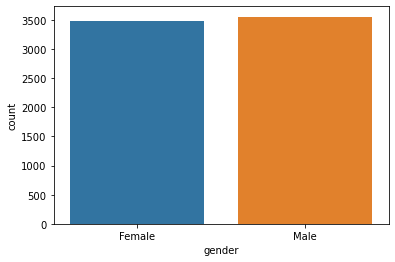

In [11]:
sns.countplot(x = "gender", data= df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

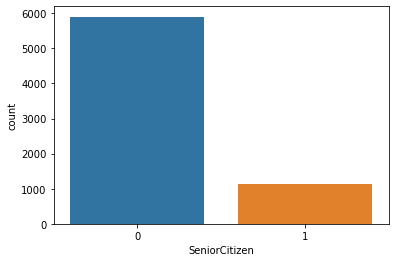

In [12]:
sns.countplot(x = "SeniorCitizen", data= df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

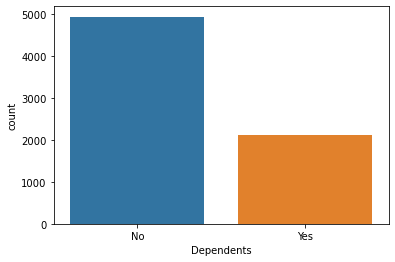

In [13]:
sns.countplot(x = "Dependents", data= df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

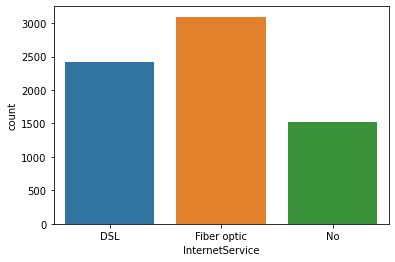

In [14]:
sns.countplot(x = "InternetService", data= df)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

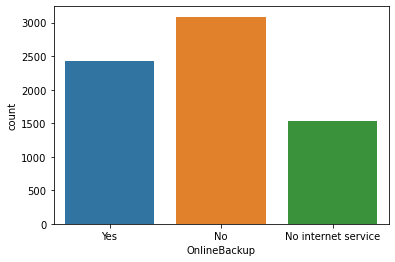

In [15]:
sns.countplot(x = "OnlineBackup", data= df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

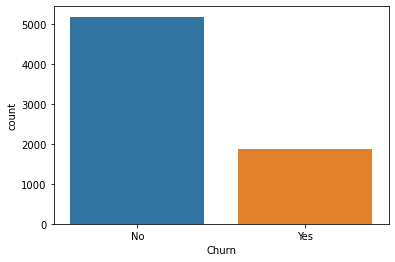

In [16]:
sns.countplot(x = "Churn", data= df)

In [18]:
#Object type columns are:

#'customerID', 'gender', 'Partner', 'Dependents'
#'PhoneService', 'MultipleLines', 'InternetService'
#'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
#'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling'
#'PaymentMethod', 'TotalCharges', 'Churn'

In [19]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [20]:
#'customerID' - can be dropped

#'TotalCharges' - can be converted to integer

#All other columns to be label encoded:

#'gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
#'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#'PaymentMethod', 'Churn'

In [21]:
df.drop(columns='customerID', axis=1, inplace = True)

In [22]:
df['TotalCharges'].fillna(value=0, inplace=True)

In [23]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")

In [24]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

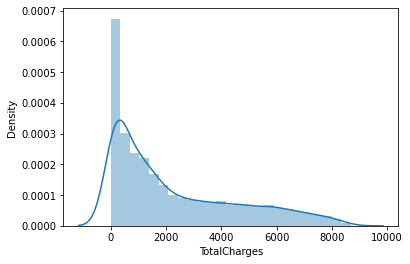

In [25]:
sns.distplot(df['TotalCharges'], kde= True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

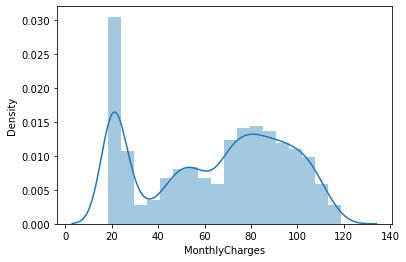

In [26]:
sns.distplot(df['MonthlyCharges'], kde= True)

In [27]:
#Changing categorical data into numeric data

In [28]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['gender'] = labelencoder.fit_transform(df['gender'])
df['Partner'] = labelencoder.fit_transform(df['Partner'])
df['Dependents'] = labelencoder.fit_transform(df['Dependents'])
df['PhoneService'] = labelencoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = labelencoder.fit_transform(df['MultipleLines'])
df['InternetService'] = labelencoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = labelencoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = labelencoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = labelencoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = labelencoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = labelencoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = labelencoder.fit_transform(df['StreamingMovies'])
df['Contract'] = labelencoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = labelencoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = labelencoder.fit_transform(df['PaymentMethod'])
df['Churn'] = labelencoder.fit_transform(df['Churn'])

df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7043 rows x 20 columns]

In [29]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

## handle null values

In [30]:
df.isna().sum() #checked for null values, there are no null values in the dataset

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

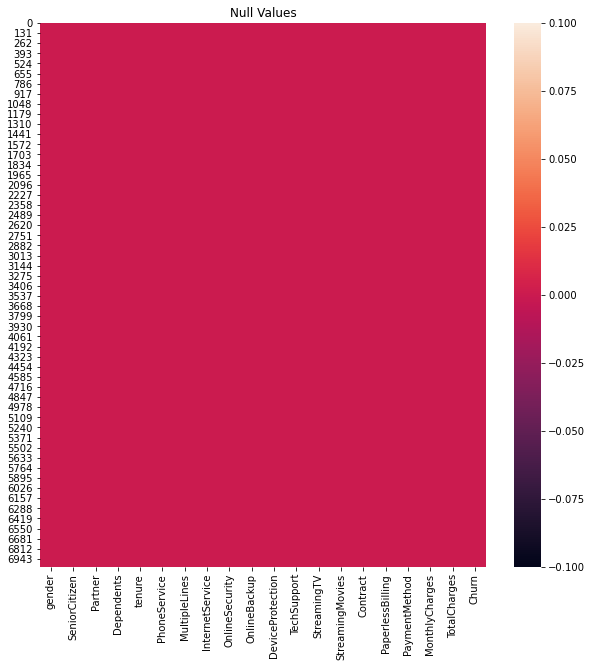

In [31]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [32]:
#Looking at the distribution of data for all columns

gender


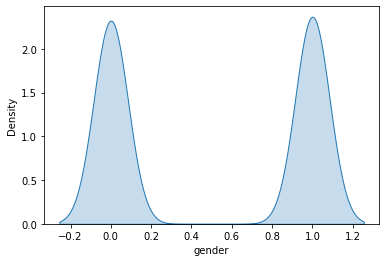

SeniorCitizen


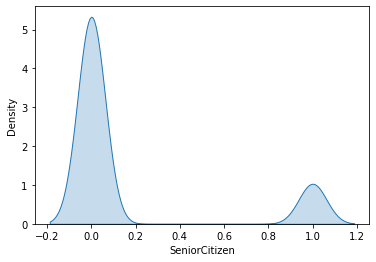

Partner


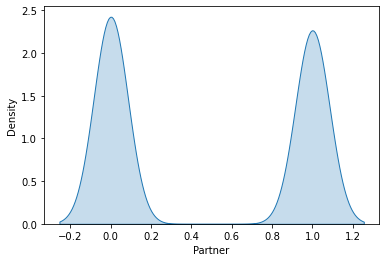

Dependents


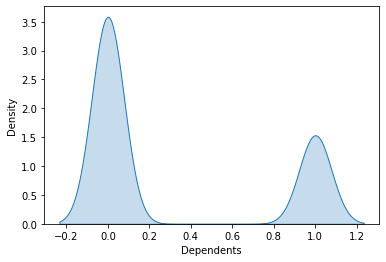

tenure


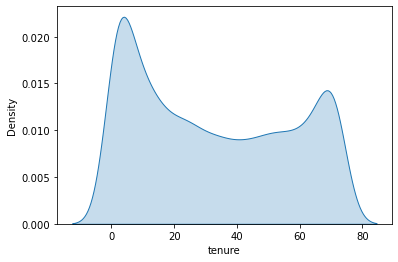

PhoneService


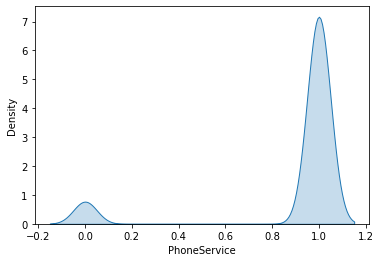

MultipleLines


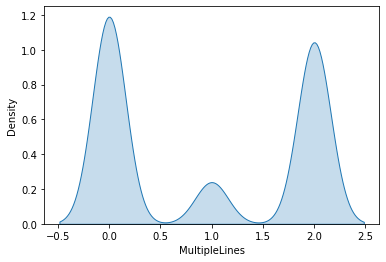

InternetService


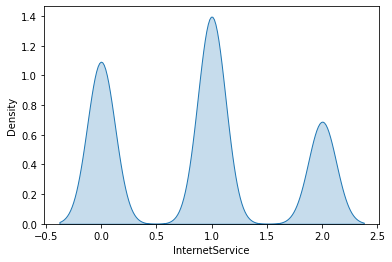

OnlineSecurity


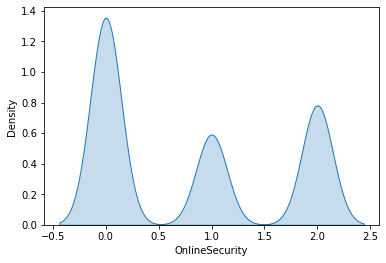

OnlineBackup


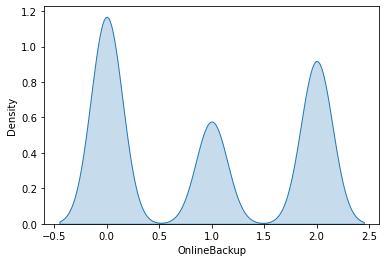

DeviceProtection


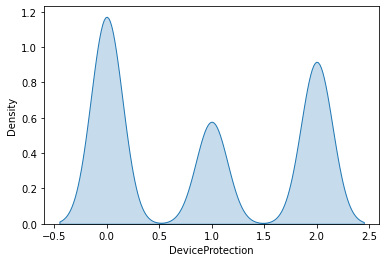

TechSupport


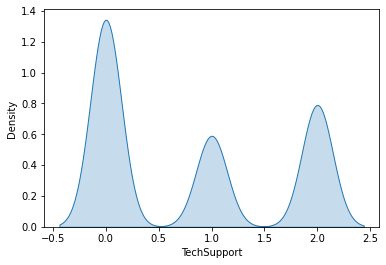

StreamingTV


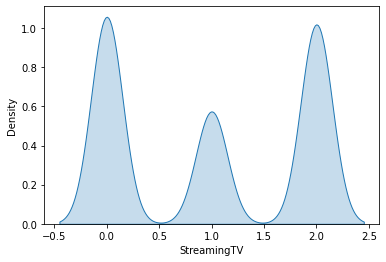

StreamingMovies


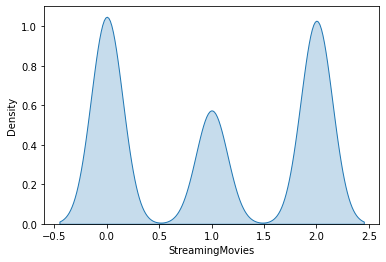

Contract


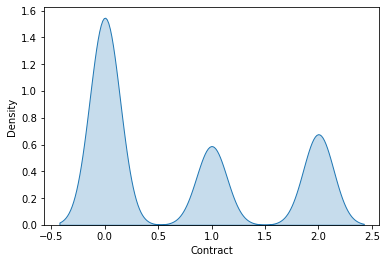

PaperlessBilling


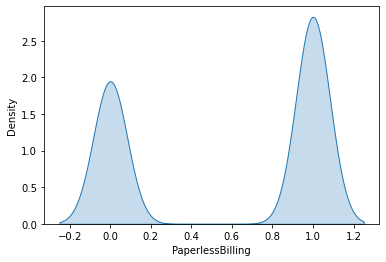

PaymentMethod


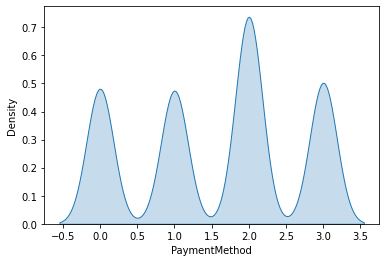

MonthlyCharges


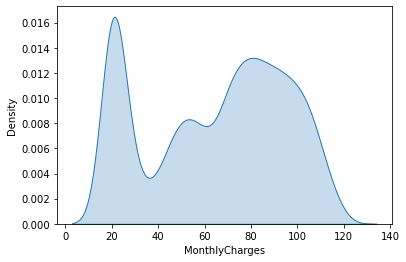

TotalCharges


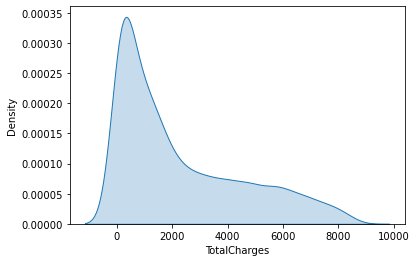

Churn


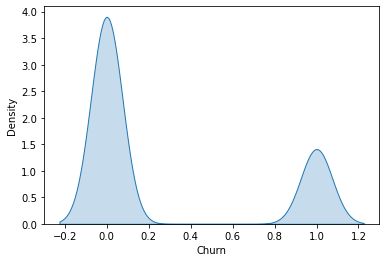

In [33]:
for col in df:
    print(col)
    
    plt.figure()
    sns.kdeplot(df[col], shade = True)
    plt.show()

In [34]:
#Dataset is imbalanced as seen from Churn column

In [35]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
pre_profile = df.profile_report(title="Customer Churn")

In [37]:
pre_profile

## check for outliers

In [38]:
#remove outliers before skewness check and before x, y split

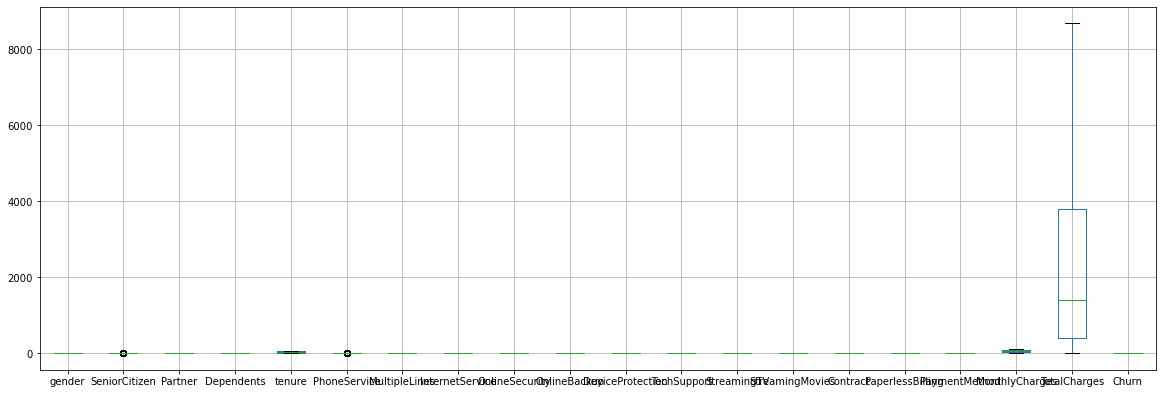

In [39]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [40]:
#Removing outliers by z score

In [41]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [42]:
new_df.shape

(6361, 20)

In [43]:
df.shape

(7043, 20)

In [44]:
dataloss = ((7043-6361)/7043)*100

In [45]:
dataloss

9.683373562402386

In [46]:
#Outliers are not removed since data loss is more than 7%.

## check co-relation

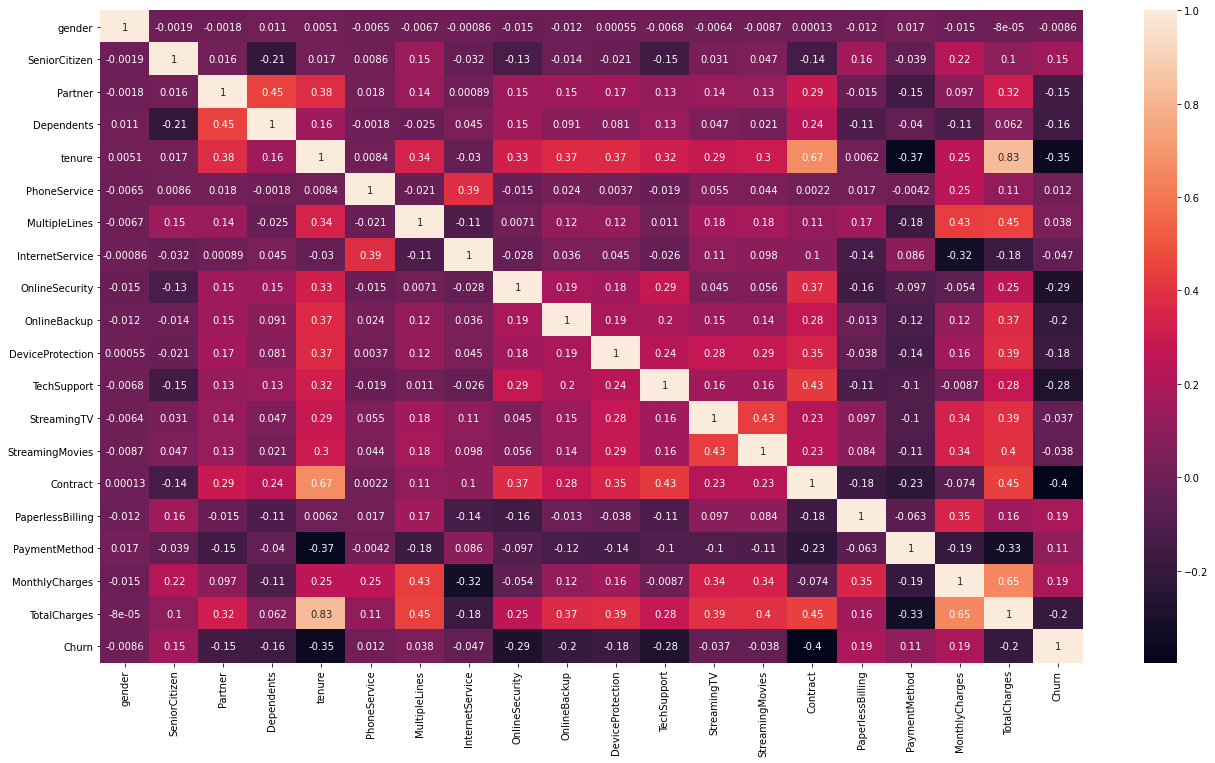

In [47]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [48]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [49]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [50]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

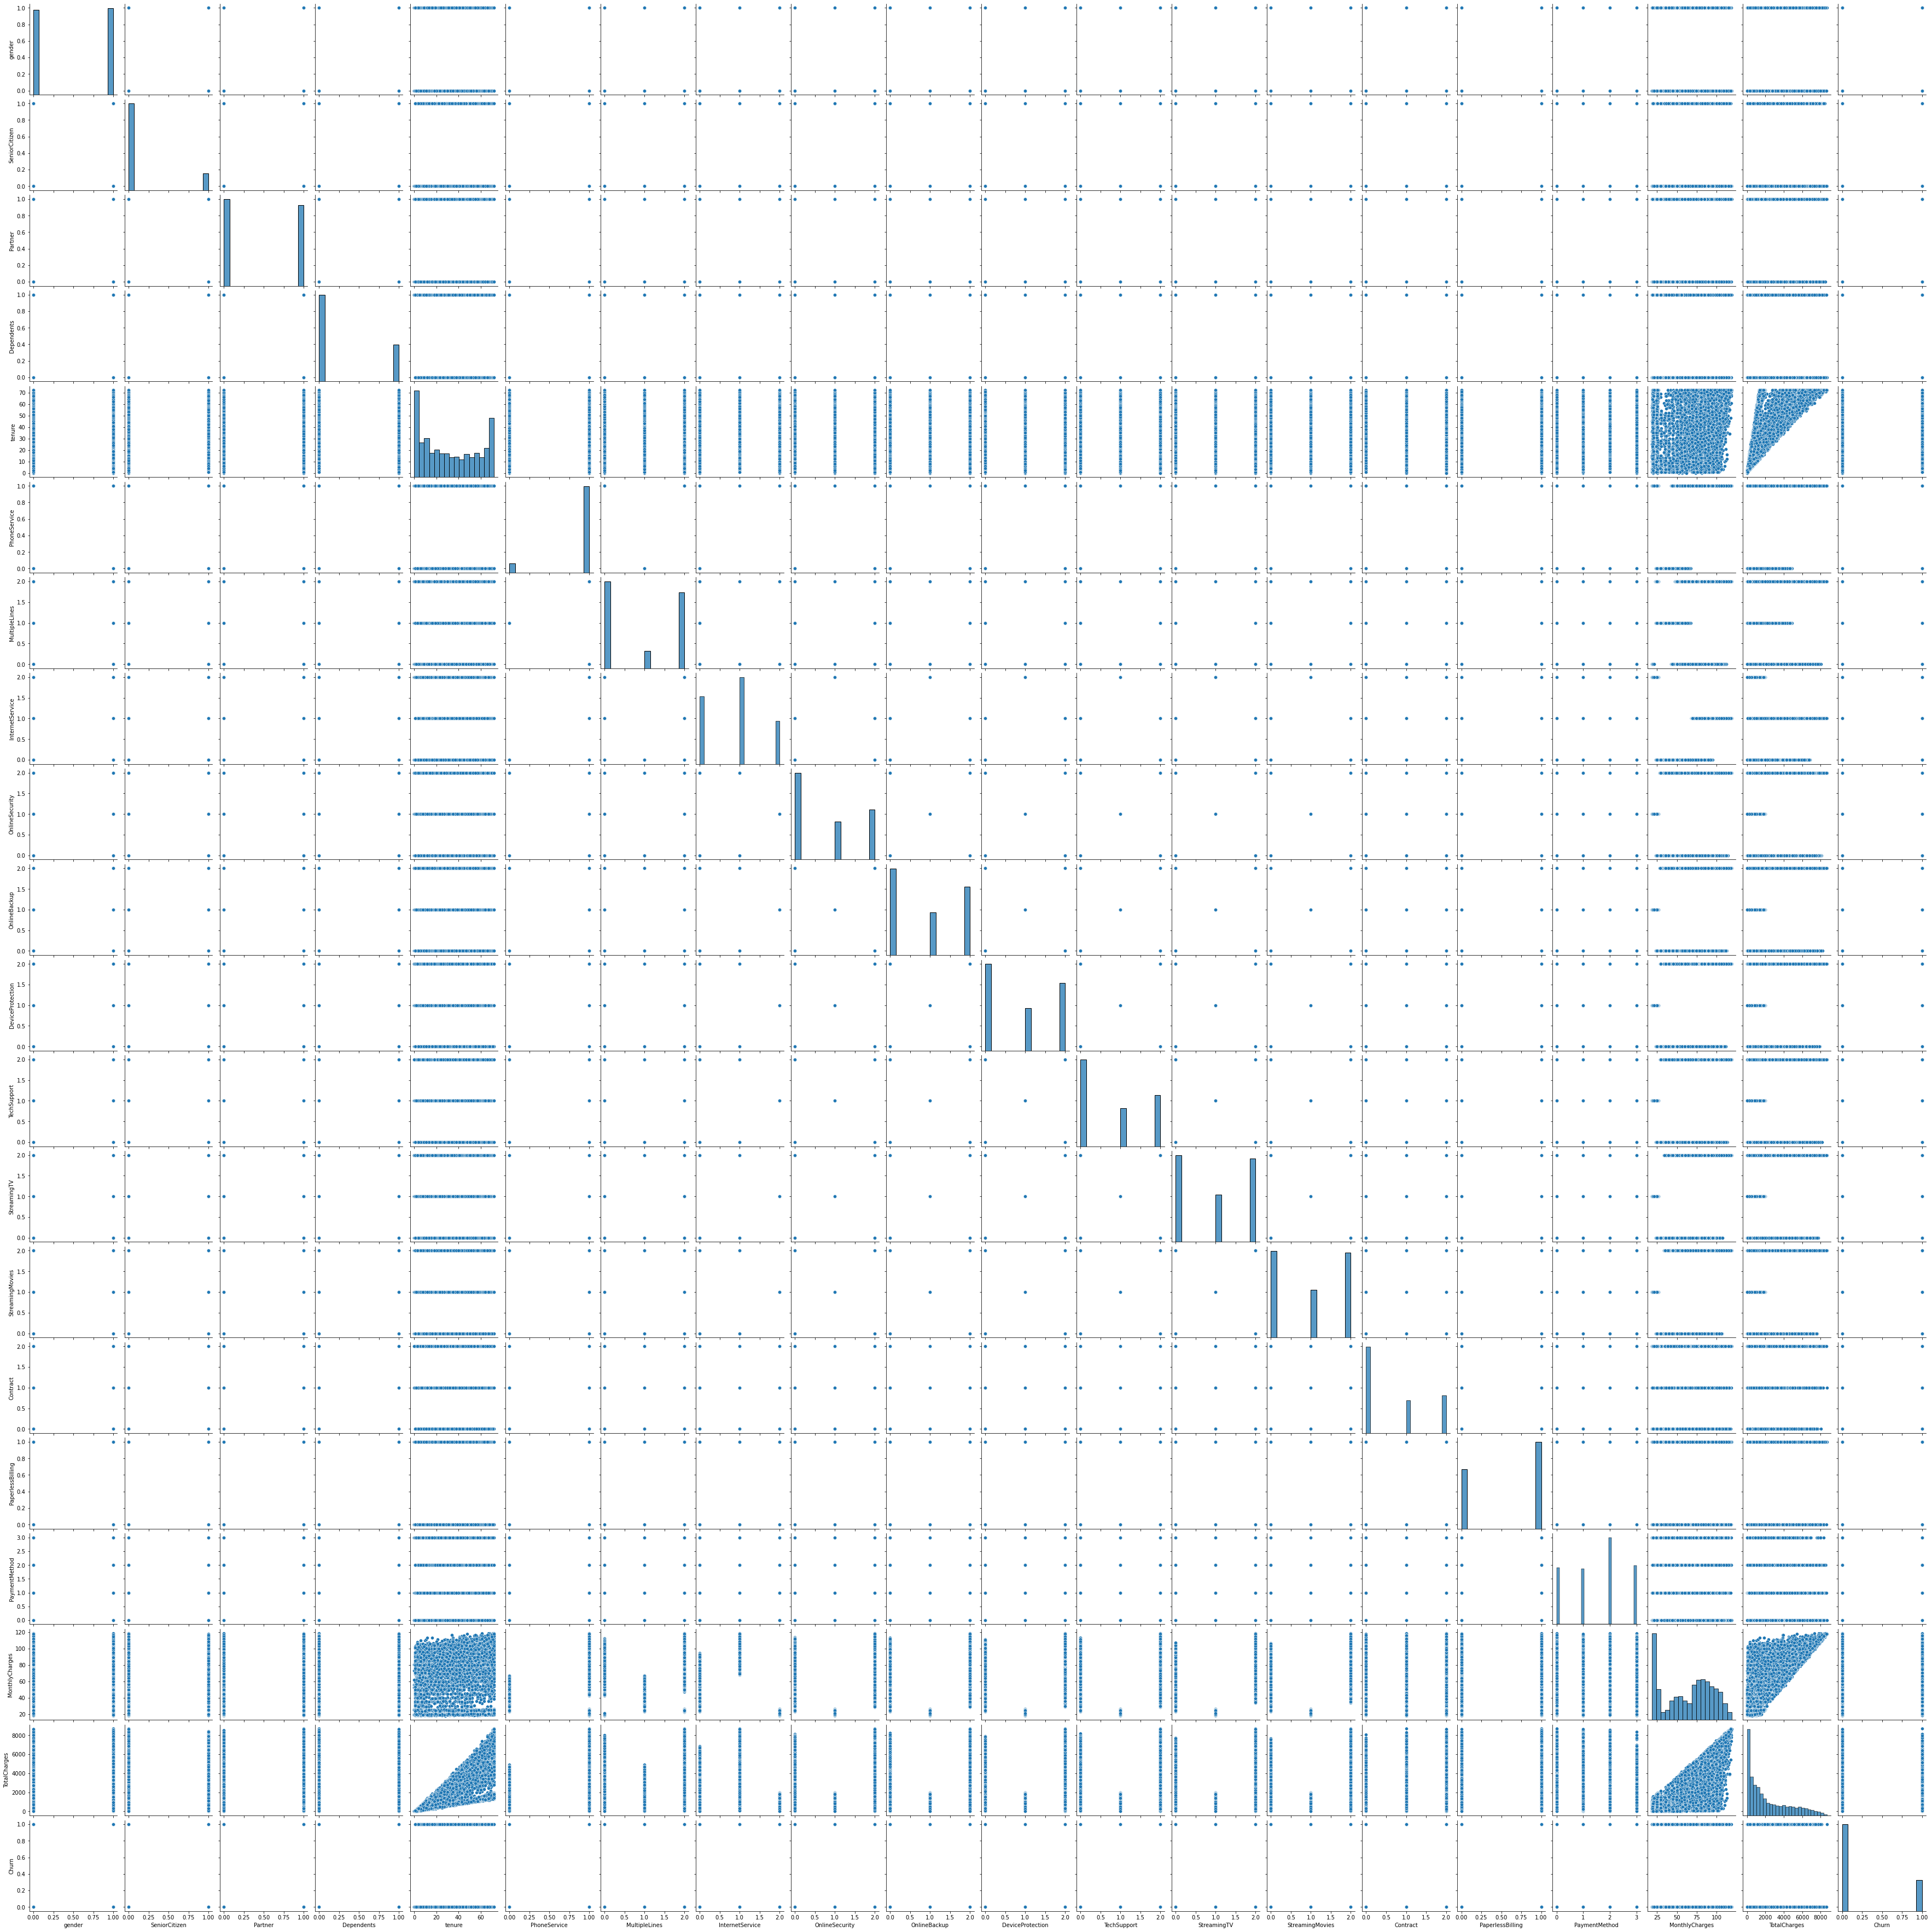

In [52]:
sns.pairplot(df[columns])

## check for skewness

In [53]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [54]:
x.skew() # check skewness

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
dtype: float64

In [55]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [56]:
df_new.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.146121
dtype: float64

In [57]:
x = df_new

## find best random state

In [58]:
#for classification problems

In [59]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    acc = accuracy_score(y_test, predLR)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," on Random State ",maxRS)

Best accuracy is 0.8291528632276385  on Random State  129


In [60]:
#We have found the best random state. We will create our train_test_split using this random state.

## test train split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=129)

## handle data imbalance

<AxesSubplot:xlabel='Churn', ylabel='count'>

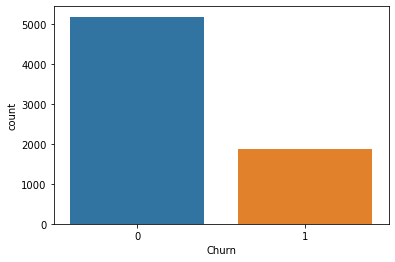

In [62]:
sns.countplot(df['Churn'])

In [63]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [64]:
!pip install imbalanced_learn
!pip install delayed

In [65]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
#transform the dataset
x,y=oversample.fit_resample(x,y)

In [66]:
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

### classification 

In [67]:
#logistic_regression

In [68]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8291528632276385
[[1450  127]
 [ 234  302]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1577
           1       0.70      0.56      0.63       536

    accuracy                           0.83      2113
   macro avg       0.78      0.74      0.76      2113
weighted avg       0.82      0.83      0.82      2113



In [69]:
#support vector machines 

In [70]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8092759110269758
[[1460  117]
 [ 286  250]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1577
           1       0.68      0.47      0.55       536

    accuracy                           0.81      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.80      0.81      0.80      2113



In [71]:
#decisiontree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(classification_report(y_test,preddt))
print(confusion_matrix(y_test,preddt))

0.7382867960246096
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1577
           1       0.49      0.53      0.51       536

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.75      0.74      0.74      2113

[[1275  302]
 [ 251  285]]


In [73]:
#random forest 

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

0.8031235210601041
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1577
           1       0.65      0.49      0.56       536

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113

[[1437  140]
 [ 276  260]]


## check cross-validation scores

In [75]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("CrossValidation Score of LogisticRegression Model: ", scr.mean())

CrossValidation Score of LogisticRegression Model:  0.7725185449807721


In [76]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("CrossValidation Score of DecisionTree Model: ", scr.mean())

CrossValidation Score of DecisionTree Model:  0.7817062082781712


In [77]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(rf, x, y, cv=5)
print("CrossValidation Score of RandomForest Model: ", scr.mean())

CrossValidation Score of RandomForest Model:  0.8511878827784433


In [78]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(svc, x, y, cv=5)
print("CrossValidation Score of SVC Model: ", scr.mean())

CrossValidation Score of SVC Model:  0.8054741374278223


In [79]:
#Model with least difference between Model accuracy and cross validation is selected as the best model
#LR -> 
82.9 - 77.64

5.260000000000005

In [80]:
# SVM -> 
80.9 - 80.6

0.30000000000001137

In [81]:
# DT -> 
73.1 - 78.4

-5.300000000000011

In [82]:
# RF -> 
80.5- 85.5

-5.0

## hyper parameter tuning

In [83]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[1459  118]
 [ 275  261]]
0.8140085186938003
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1577
           1       0.69      0.49      0.57       536

    accuracy                           0.81      2113
   macro avg       0.77      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [84]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [85]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [86]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 890,
 'criterion': 'gini'}

In [87]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [88]:
best_random_grid=rf_randomcv.best_estimator_

In [89]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1453  124]
 [ 270  266]]
Accuracy Score 0.8135352579271179
Classification report:               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1577
           1       0.68      0.50      0.57       536

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



## Grid Search CV

In [107]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 670,
 'criterion': 'entropy'}

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [670], 'max_features': ['auto'], 'min_samples_leaf': [8, 10, 12], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1400, 1500, 1600, 1700, 1800]}


In [109]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [670],
                         'max_features': ['auto'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1400, 1500, 1600, 1700, 1800]},
             verbose=2)

In [110]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=670, min_samples_leaf=12,
                       min_samples_split=4, n_estimators=1700)

In [111]:
best_grid=grid_search.best_estimator_

In [112]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=670, min_samples_leaf=12,
                       min_samples_split=4, n_estimators=1700)

In [113]:
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1453  124]
 [ 271  265]]
Accuracy Score 0.8130619971604354
Classification report:               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1577
           1       0.68      0.49      0.57       536

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



## saving the model

In [ ]:
import joblib
joblib.dump(best_grid, "model.pkl") #rename as per project name
prediction = model.predict(x_test)